Assignment Questions

EDA - 1

In [1]:
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv("BIKE DETAILS.csv")
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


Q1 What is the range of selling prices in the dataset?

In [4]:
min_selling_price = df["selling_price"].min()
max_selling_price= df["selling_price"].max()
print(f"The range between minimum and maximum selling price is Rs{min_selling_price} to Rs{max_selling_price}")

The range between minimum and maximum selling price is Rs5000 to Rs760000


Q2 What is the median selling price for bikes in the dataset?

In [5]:
median_selling_price = df["selling_price"].median()
print(f"the median selling price for bikes in the dataset is Rs{median_selling_price}")

the median selling price for bikes in the dataset is Rs45000.0


Q3 What is the most common seller type?

In [6]:
common_seller = df.loc[:,"seller_type"].value_counts()
print(common_seller)

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


Q4 How many bikes have driven more than 50,000 kilometers?

In [7]:
filt = df.loc[:,"km_driven"] > 50000
fiftyk_driven_bikes = df.loc[filt].value_counts()
fiftyk_driven_bikes.shape[0]

86

Q5 What is the average km_driven value for each ownership type?

In [8]:
average_km_owner = df.groupby("owner")["km_driven"].mean()
print(average_km_owner)

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


Q6 What proportion of bikes are from the year 2015 or older?

In [9]:
filt = df["year"]<= 2015
proportion = len(filt)/len(df)
print(f"The proportion of bikes from the year 2015 or older is: {proportion}")

The proportion of bikes from the year 2015 or older is: 1.0


Q7 What is the trend of missing values across the dataset?

In [10]:
missing_values = df.isnull().sum()

print(missing_values)

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


Q8 What is the highest ex_showroom_price recorded, and for which bike?

In [11]:
filt = df["ex_showroom_price"] == df["ex_showroom_price"].max()
highest_price_bike = df.loc[filt]
highest_price_bike

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
134,Harley-Davidson Street Bob,750000,2013,Individual,2nd owner,12000,1278000.0


Q9 What is the total number of bikes listed by each seller type?

In [12]:
total_bikes = df.loc[:,"seller_type"].value_counts()
print(total_bikes)

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


Q10 What is the relationship between selling_price and km_driven for first-owner bikes?

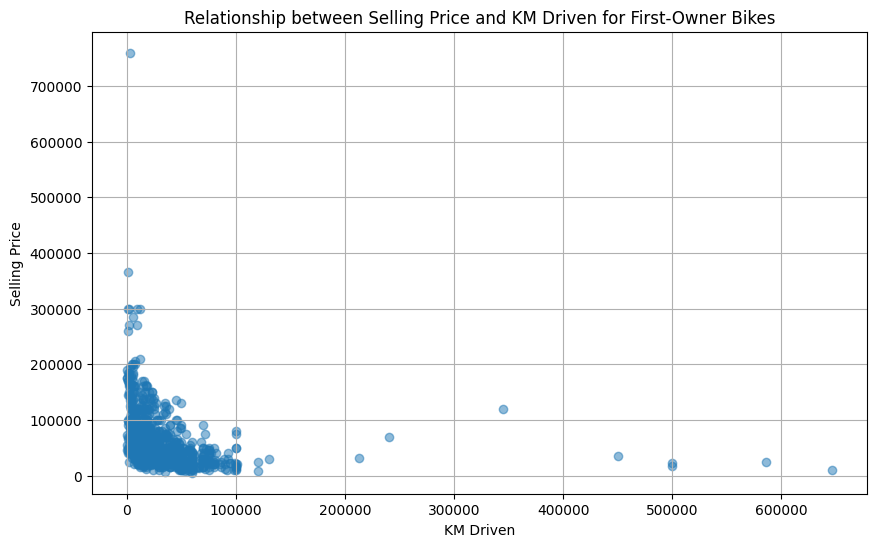

The correlation coefficient between selling price and km driven for first-owner bikes is: -0.24


In [13]:
filt = df["owner"] == "1st owner"
selling_prices = df.loc[filt,"selling_price"]
km_driven = df.loc[filt,"km_driven"]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(km_driven, selling_prices, alpha=0.5)
plt.title('Relationship between Selling Price and KM Driven for First-Owner Bikes')
plt.xlabel('KM Driven')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

# Calculate the correlation coefficient
correlation = selling_prices.corr(km_driven)
print(f"The correlation coefficient between selling price and km driven for first-owner bikes is: {correlation:.2f}")

Q11  Identify and remove outliers in the km_driven column using the IQR method?

In [14]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
filt = df["km_driven"]
Q1 = filt.quantile(0.25)
Q3 = filt.quantile(0.75)
# Calculate the IQR
IQR = Q3 - Q1
# lower and upper bound

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers

outliers = df[(filt < lower_bound) | (filt> upper_bound)]

# Remove outliers
df_cleaned = df[(filt>= lower_bound) & (filt<= upper_bound)]

print(f"Number of outliers: {len(outliers)}")
print(f"Number of rows after removing outliers: {len(df_cleaned)}")

Number of outliers: 39
Number of rows after removing outliers: 1022


Q12 Perform a bivariate analysis to visualize the relationship between year and selling_price?

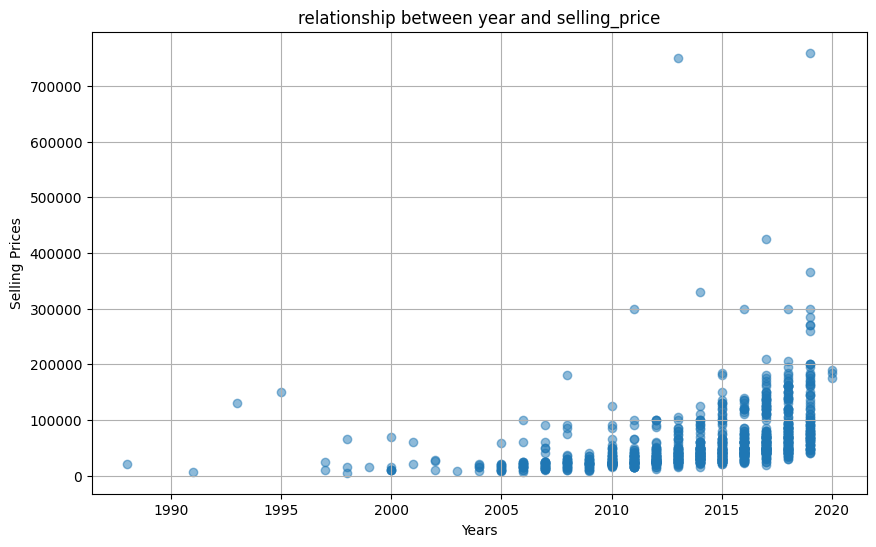

In [15]:
x_year = df["year"]
y_selling_price = df["selling_price"]

plt.figure(figsize =(10,6))
plt.scatter(x_year,y_selling_price,alpha = 0.5,)
plt.xlabel("Years")
plt.ylabel("Selling Prices")
plt.title("relationship between year and selling_price")
plt.grid()
plt.show()

Q13  What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year)?

In [16]:
# Define the current year
current_year = 2024

# Calculate the bike's age
df['age'] = current_year - df['year']

# Calculate the depreciation for each bike
df['depreciation'] = df['selling_price'] / df['age']

# Calculate the average depreciation
average_depreciation = df['depreciation'].mean()

print(f"The average depreciation in selling price based on the bike's age is: {average_depreciation:.2f}")

The average depreciation in selling price based on the bike's age is: 8036.51


In [17]:
df.head(10).value_counts()

,,,,,,,,,count
name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age,depreciation,
Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0,8,6250.000000,1
Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0,6,13083.333333,1
Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0,14,1285.714286,1
Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,6,25000.000000,1
Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,9,7222.222222,1


Q14 Which bike names are priced significantly above the average price for their manufacturing year?

In [18]:
# Calculate the average selling price for each year
average_price_by_year = df.groupby('year')['selling_price'].mean()

# Merge the average price back to the original DataFrame
df = df.merge(average_price_by_year, on='year', suffixes=('', '_avg'))

# Define a threshold for "significantly above average" (e.g., 1.5 times the average price)
threshold = 1.5

# Identify bikes priced significantly above the average price for their manufacturing year
significantly_above_avg = df[df['selling_price'] > threshold * df['selling_price_avg']]

# Get the names of these bikes
bike_names_above_avg = significantly_above_avg['name']

print(bike_names_above_avg)

2       Royal Enfield Classic Gunmetal Grey
7      Royal Enfield Bullet 350 [2007-2011]
13                            Yamaha YZF R3
18      Royal Enfield Classic Gunmetal Grey
23                            Jawa Standard
                       ...                 
979               Royal Enfield Thunder 500
981               Royal Enfield Thunder 350
983               Royal Enfield Classic 350
984               Royal Enfield Classic 500
985               Royal Enfield Classic 500
Name: name, Length: 157, dtype: object


Q15 Develop a correlation matrix for numeric columns and visualize it using a heatmap.

                   selling_price      year  km_driven  ex_showroom_price  \
selling_price           1.000000  0.402188  -0.212937           0.918583   
year                    0.402188  1.000000  -0.288675           0.126378   
km_driven              -0.212937 -0.288675   1.000000          -0.122011   
ex_showroom_price       0.918583  0.126378  -0.122011           1.000000   
age                    -0.402188 -1.000000   0.288675          -0.126378   
depreciation            0.935495  0.512554  -0.228780           0.750566   
selling_price_avg       0.501140  0.802547  -0.309402           0.146598   

                        age  depreciation  selling_price_avg  
selling_price     -0.402188      0.935495           0.501140  
year              -1.000000      0.512554           0.802547  
km_driven          0.288675     -0.228780          -0.309402  
ex_showroom_price -0.126378      0.750566           0.146598  
age                1.000000     -0.512554          -0.802547  
depreciation 

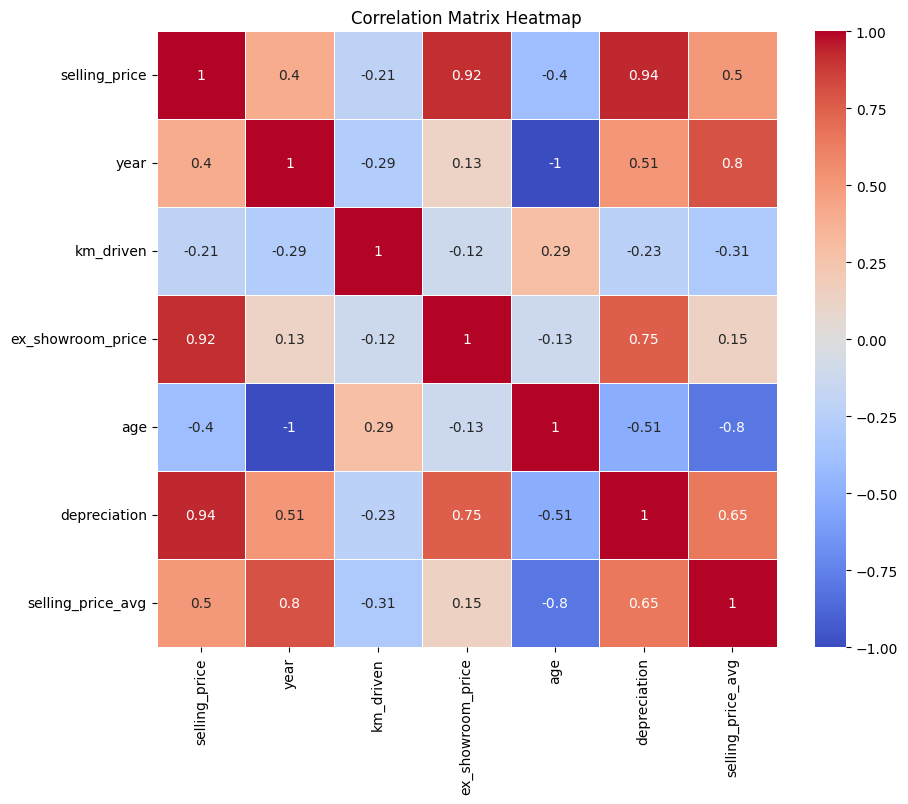

In [19]:
import numpy as np
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Print the correlation matrix
print(correlation_matrix)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()